In [52]:
#QUESTION 1
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#seaborn for output plot style
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [53]:
#Reading CC.csv dataset
dataframe_cc= pd.read_csv(r"./CC.csv")
print(dataframe_cc.head())
dataframe_cc['TENURE'].value_counts()
x = dataframe_cc.iloc[:,[1,2,3,4]]
y = dataframe_cc.iloc[:,-1]

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [54]:
#Applying PCA
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataframe_cc['CUST_ID'] = le.fit_transform(dataframe_cc.CUST_ID.values)
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataframe_cc[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-1500.250819,-1114.178407,12
1,-592.910661,1914.657567,12
2,217.734556,905.144354,12
3,927.782551,-198.923616,12
4,-1310.548986,-359.591021,12


In [55]:
#Applying KMeans
from sklearn.cluster import KMeans
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(x)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)

In [56]:
#Apply scaling and then PCA
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhouette score before scaling is ",score)
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)
principalDf1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf1 = pd.concat([principalDf1, dataframe_cc[['TENURE']]], axis = 1)
finalDf1.head()

Silhouette score before scaling is  0.7526240640619958


,principal component 1,principal component 2,TENURE
0,-0.786173,0.422114,12
1,-0.278329,-0.803393,12
2,0.255916,-0.630364,12
3,0.277478,0.873840,12
4,-0.510060,-0.341918,12


In [57]:
#Applying KMeans on scaled dataset
from sklearn.cluster import KMeans
nclusters = 2 
km = KMeans(n_clusters=nclusters)
km.fit(X_Scale)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_Scale)
from sklearn import metrics
score = metrics.silhouette_score(X_Scale, y_cluster_kmeans)
print("Silhouette score after scaling is ",score)

Silhouette score after scaling is  0.6778894462339318


In [58]:
#QUESTION2

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#reading dataset
df= pd.read_csv(r"./pd_speech_features.csv")
df.head()
df.shape

(756, 755)

In [59]:
df['class'].value_counts()
X = df.drop('class',axis=1).values
y = df['class'].values

In [60]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)
#Applying PCA with K=3
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471076,-6.846408,1
1,-10.637725,1.583749,-6.830978,1
2,-13.516185,-1.253543,-6.818700,1
3,-9.155084,8.833601,15.290896,1
4,-6.764470,4.611468,15.637117,1


In [61]:
#Using SVM to find out performance accuracy
X_train, X_test, y_train, y_test = train_test_split(X_Scale,y, test_size=0.3,random_state=0)
svc = SVC(max_iter=1000)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
accuracy = round(svc.score(X_train, y_train) * 100, 2)
print("svm accuracy =", accuracy)

svm accuracy = 91.68


In [62]:
#QUESTION 3

from matplotlib import pyplot as plt
#reading dataset
df = pd.read_csv(r"./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(df.iloc[:,range(0,4)].values)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Species'].values)

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,9.423452,-0.513976,0
1,8.751900,-1.591678,0
2,8.973004,-1.068204,0
3,8.170186,-1.435135,0
4,9.249789,-0.136869,0


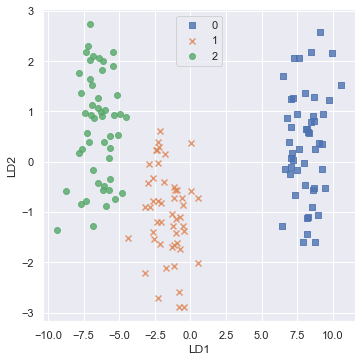

In [65]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

In [66]:
#4. Briefly identify the difference between PCA and LDA

#To optimize variance in a smaller dimension, LDA and PCA both require on linear transformations. Unlike LDA, which uses supervised learning, PCA uses unsupervised learning. Accordingly, LDA discovers directions of maximal class separability while PCA discovers directions of maximum variance irrespective of class labels.
#The goals of LDA and PCA are the same: to maximize variance in a lower dimension via linear transformations. Unlike LDA, which uses supervised learning, PCA uses unsupervised learning. This indicates that although LDA identifies pathways of maximum class separability, PCA finds directions of maximum variance regardless of class labels.